In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# challenge 1 - Least squares via QR decomposition
# generate random data (X and y)
# compare the results against standard left inverse method
X = np.random.rand(20, 3);
y = np.random.rand(20, 1);

A1 = np.linalg.lstsq(X,y,rcond=None)
print(A1[0])
Q, R = np.linalg.qr(X);
A2 = np.matmul(np.linalg.inv(np.matmul(R.transpose(), R)), np.matmul(np.matmul(Q, R).transpose(), y));
# we can also write A2 as:
# A2 = np.linalg.solve(R.T@R, (Q@R).T@y);
print(A2)

[[0.40938217]
 [0.17547954]
 [0.19162885]]
[[0.40938217]
 [0.17547954]
 [0.19162885]]


[-1.  6.]


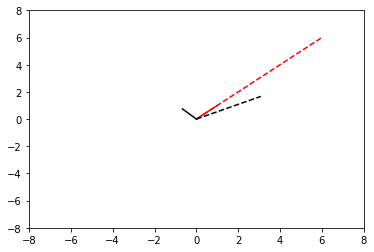

In [4]:
# eigenvalues
A = [ [1, 5], [2, 4]]

#extract the eigenvalues
eigvals = np.linalg.eig(A)

# note that the eigenvalues are in the first element of eigvals:
print(eigvals[0])

# specify two vectors
v1 = np.array([1, 1]) # is an eigenvector!
v2 = np.random.randn(2, 1) # unlikely to be an eigenvector
v2 = v2/np.linalg.norm(v2) # unit length for convenience

# compute Av
Av1 = A@v1
Av2 = A@v2

# plot the vectors and Av
plt.plot([0, v1[0]], [0, v1[1]], 'r')
plt.plot([0, Av1[0]], [0, Av1[1]], 'r--')
plt.plot([0, v2[0]], [0, v2[1]], 'k')
plt.plot([0, Av2[0]], [0, Av2[1]], 'k--')

plt.axis([-8,8, -8, 8])
plt.show()

In [42]:
# generate a diagonal matrix (2x2), compute its eigenvalues
def getDiagEigenV(numb_N):
    v = np.random.rand(numb_N)
    diagM = np.diag(v)
    eigvals = np.linalg.eig(diagM)
    return eigvals

eigvals1 = getDiagEigenV(2)
print(eigvals1[0])

# expand this to NxN diagonal matrices
eigvals2 = getDiagEigenV(10)
print(eigvals2[0])

triN = 4
# triangular matrices (lower, upper).
trigM = np.random.randn(triN, triN)
trigML = np.tril(trigM)
trigMU = np.triu(trigM)

eigvals3 = np.linalg.eig(trigML)
eigvals4 = np.linalg.eig(trigMU)
print(eigvals3[0])
print(eigvals4[0])

# see what patterns emerge

[0.95502173 0.21169122]
[0.65690789 0.09367386 0.17485348 0.62893352 0.11833338 0.67205133
 0.50378137 0.44248825 0.95320509 0.75871739]
[-0.71396939 -0.89641208  0.51600033 -0.5021814 ]
[-0.5021814   0.51600033 -0.89641208 -0.71396939]


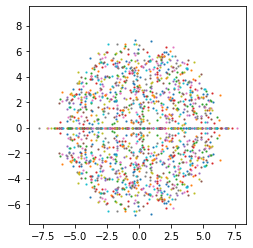

In [17]:
for i in range(0, 40):
    A = np.random.randn(40, 40)
    eigvals = np.linalg.eig(A)[0]
    plt.plot(np.real(eigvals), np.imag(eigvals), 's', markersize=1)

plt.axis('square')
plt.show()

In [9]:
# eigendecomposition of matrix differences
N = 5
A = np.random.randn(N, N)
B = np.random.randn(N, N)
A = A.T @ A
B = B.T @ B

diff = (A - B)
diff2 = np.linalg.matrix_power((A - B), 2)
eigvals, eigvecs = np.linalg.eig(diff)
eigvals2, eigvecs2 = np.linalg.eig(diff2)

print(np.round(eigvals ** 2))
print(np.round(eigvals2))

# the order is different, lets fix that

[115.  44.   2.   9.   2.]
[115.  44.   9.   2.   2.]


In [14]:
# sort eigenvals
sidx1 = np.argsort(abs(eigvals))
sidx2 = np.argsort(eigvals2)
print(sidx1)

[0 2 3 1 4]


In [15]:
# now the actual sorting
eigvals = eigvals[sidx1]
eigvals2 = eigvals2[sidx2]
print(eigvals**2), print(eigvals2)

[  1.66887883   2.26030989   8.99453635  44.02683432 114.93448144]
[  1.66887883   2.26030989   8.99453635  44.02683432 114.93448144]


(None, None)

In [16]:
# vectors
np.round(eigvecs - eigvecs2, 3)

array([[-0.000e+00,  0.000e+00,  1.000e-03, -5.800e-01, -5.790e-01],
       [ 0.000e+00,  0.000e+00, -2.760e-01,  8.360e-01,  5.600e-01],
       [ 0.000e+00, -0.000e+00,  1.300e-02, -6.980e-01, -6.850e-01],
       [-0.000e+00, -0.000e+00, -6.680e-01,  6.330e-01, -3.400e-02],
       [ 0.000e+00, -0.000e+00, -1.216e+00,  2.770e-01, -9.380e-01]])

In [90]:
# reconstruct a matrix from eigenlayers
# step 1: create an mxm symmetric matrix, take its eigendecomposition
M = 4
A = np.random.randn(M, M)
A = np.round(10 * A.T * A)

# step 1.1: eigendecomposition
A_eig_vals, A_eig_vecs = np.linalg.eig(A_sym)

# step 2: show that the norm of the outer product of v_i (i index of the eigen vector) is one
X = A_eig_vecs[:, 0]
np.linalg.norm(np.outer(X, X))

# step 3: create one layer of A as lambda * v * v' - this should be the eigenvalue
v_1 = A_eig_vecs[:, 0]
Layer_1 = A_eig_vals[0] * np.outer(v_1, v_1)
Layer_1_norm = np.linalg.norm(Layer_1)
print(A_eig_vals[0])
print(Layer_1_norm)

# step 4: reconstruct A by summing over the eigenlayers (outer product)
A_rec = np.zeros((M, M))
for i in range(M):
    v = np.reshape(A_eig_vecs[:, i], (M, 1))
    A_rec += np.outer(A_eig_vecs[:,i], A_eig_vecs[:,i])* A_eig_vals[i]

print(A)
print(A_comp)
print(A - A_rec)

39.746359888928865
39.74635988892887
[[ 2. -6.  6. -3.]
 [-6.  0.  0. -2.]
 [ 6.  0.  2. -3.]
 [-3. -2. -3.  1.]]
[[ 1.80000000e+01  4.00000000e+00 -1.79630616e-15  4.00000000e+00]
 [ 4.00000000e+00  2.00000000e+01  2.00000000e+00  9.00000000e+00]
 [-2.01835076e-15  2.00000000e+00  1.00000000e+00 -2.00000000e+00]
 [ 4.00000000e+00  9.00000000e+00 -2.00000000e+00  3.40000000e+01]]
[[-16. -10.   6.  -7.]
 [-10. -20.  -2. -11.]
 [  6.  -2.   1.  -1.]
 [ -7. -11.  -1. -33.]]


In [60]:
# reconstruct a matrix from eigenlayers
# step 1: create an mxm symmetric matrix, take its eigendecomposition
# step 2: show that the norm of the outer product of v_i (i index of the eigen vector) is one
# step 3: create one layer of A as lambda * v * v' - this should be the eigenvalue
# step 4: reconstruct A by summing over the eigenlayers (outer product)

In [6]:
# trace(A) = sum(evals)
# det(A) = prod(evals)

# first for full rank
M = 4
A = np.random.randn(M, M)
traceA = np.trace(A)
detA = np.linalg.det(A)

eigvals, eigvectors = np.linalg.eig(A)
sumEvals = np.sum(eigvals)
prodEvals = np.prod(eigvals)

print('Trace & det: ')
print(traceA)
print(detA)

print('Sum & prod of eigvals: ')
print(sumEvals)
print(prodEvals)

# repeat for reduced rank
M = 4
A = np.random.randn(M, M)
A[:, 1] = A[:, 0] * 2
traceA = np.trace(A)
detA = np.linalg.det(A)

eigvals, eigvectors = np.linalg.eig(A)
sumEvals = np.sum(eigvals)
prodEvals = np.prod(eigvals)

print('Trace & det: ')
print(traceA)
print(detA)

print('Sum & prod of eigvals: ')
print(sumEvals)
print(prodEvals)

Trace & det: 
1.4455235751552713
0.02616867074450174
Sum & prod of eigvals: 
1.4455235751552717
0.026168670744502395
Trace & det: 
-1.6222404623576434
1.0943242555223976e-16
Sum & prod of eigvals: 
(-1.6222404623576465+0j)
(-9.388286389068397e-16+0j)


[-0.75430141+0.j  1.32572998+0.j]
[-1.32572998  0.75430141]
[[-0.6827953  -0.36261788]
 [ 0.73060973 -0.93193791]]
0.7306097297859638


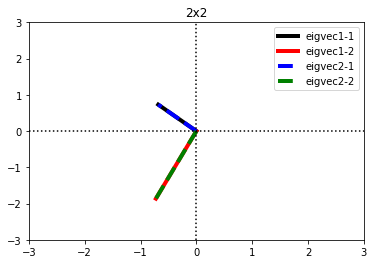

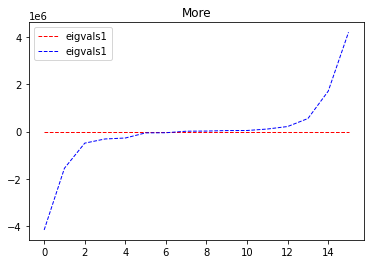

In [33]:
import scipy.linalg
import matplotlib.pyplot as plt
import scipy.io

# goal: compare eig(S, R) with eig(inv(R)*S)
# part 1: GED on 2x2 matric. Plot eigenvectors.
A = np.array([[3, 2], [1, 3]])
B = np.array([[1, 2], [4, 1]])

eigvals1, eigvecs1 = scipy.linalg.eig(A, B)
eigvals2, eigvecs2 = np.linalg.eig(np.linalg.inv(A) @ B)
print(eigvals1)
print(eigvals2)

print(eigvecs1)
print(eigvecs1[1, 0])

plt.plot([0,eigvecs1[0,0]],[0,eigvecs1[1,0]],'k',linewidth=4,label='eigvec1-1')
plt.plot([0,eigvecs1[0,1] * 2],[0,eigvecs1[1,1] * 2],'r',linewidth=4,label='eigvec1-2')
plt.plot([0,eigvecs2[0,0]],[0,eigvecs2[1,0]],'b--',linewidth=4,label='eigvec2-1')
plt.plot([0,eigvecs2[0,1] * 2],[0,eigvecs2[1,1] * 2],'g--',linewidth=4,label='eigvec2-2')
plt.xlim([-3,3]), plt.ylim([-3,3])
plt.plot([-3,3],[0,0],'k:')
plt.plot([0,0],[-3,3],'k:')
plt.legend()
plt.title('2x2')
plt.show()

# part 2: with real data matrices. Plot eigenvalues.
mat = scipy.io.loadmat('real_matrices.mat')
R = mat['R']
S = mat['S']
eigvals1, eigvecs1 = scipy.linalg.eigh(S, R)
eigvals2, eigvecs2 = scipy.linalg.eigh(np.linalg.inv(R) @ S)

plt.plot(eigvals1, 'r--', linewidth=1, label='eigvals1')
plt.plot(eigvals2, 'b--', linewidth=1, label='eigvals1')
plt.legend()
plt.title('More')
plt.show()